In [22]:
import pandas as pd
from pandas import DataFrame

try:
# Carica il tuo file XLSX
    xlsx_file = 'dataset/richerDataset.xlsx'  # Sostituisci con il percorso del tuo file

# Leggi i dati dal file XLSX e crea un DataFrame
    df: DataFrame = pd.read_excel(xlsx_file)

# Ora hai un DataFrame con tutti i dati dal tuo file XLSX che puoi utilizzare per l'analisi.
except FileNotFoundError as e:
    print("Il file non è stato trovato.")
# except Exception as e:
    print(f"Si è verificato un errore: {e}")                                                          
    
# Rimuovi il record con k_m2 uguale a 0
df = df[df['k_m2'] != 0]
#Rimuovi colonne Porosity tot e SSA tot
df = df.drop(['Porosity_Tot', 'SSA_Tot'], axis=1)
# Resetta gli indici del DataFrame
df.reset_index(drop=True, inplace=True)



k2_max = df['k_m2'].max()
k2_min = df['k_m2'].min()
print(df)



    Conn.Dens.  Porosity     SSA      Ech  Tortuosity          k_m2
0      310.913     0.137   5.065  -25.849      2.0340  1.473350e-12
1      310.913     0.147   5.253  -31.002      2.6650  2.254724e-12
2      310.913     0.131   4.697  -20.047      2.1090  9.543177e-12
3      350.137     0.115   5.583  -50.613      4.1830  9.664920e-13
4      350.137     0.139   7.447 -136.737      2.5950  9.180783e-13
5      350.137     0.115   5.311  -32.907      4.1010  1.435774e-12
6      368.141     0.134   6.990 -115.218      2.7740  4.010302e-13
7      368.141     0.138   7.132 -110.411      2.7790  3.937021e-12
8      368.141     0.116   5.290  -39.748      3.8680  1.933907e-12
9       10.573     0.020   0.791   -3.948      3.1000  3.021802e-13
10      10.573     0.020   0.806   -2.017      2.9000  3.190436e-13
11     458.436     0.273   7.721 -102.424      1.7170  5.516051e-11
12     458.436     0.250   6.870  -76.478      1.3530  3.822390e-11
13     458.436     0.265   7.560  -95.050      1

In [23]:
import numpy as np
df['k_m2'] = np.log10(df['k_m2'])
print(df)

    Conn.Dens.  Porosity     SSA      Ech  Tortuosity       k_m2
0      310.913     0.137   5.065  -25.849      2.0340 -11.831694
1      310.913     0.147   5.253  -31.002      2.6650 -11.646907
2      310.913     0.131   4.697  -20.047      2.1090 -11.020307
3      350.137     0.115   5.583  -50.613      4.1830 -12.014802
4      350.137     0.139   7.447 -136.737      2.5950 -12.037120
5      350.137     0.115   5.311  -32.907      4.1010 -11.842914
6      368.141     0.134   6.990 -115.218      2.7740 -12.396823
7      368.141     0.138   7.132 -110.411      2.7790 -11.404832
8      368.141     0.116   5.290  -39.748      3.8680 -11.713564
9       10.573     0.020   0.791   -3.948      3.1000 -12.519734
10      10.573     0.020   0.806   -2.017      2.9000 -12.496150
11     458.436     0.273   7.721 -102.424      1.7170 -10.258372
12     458.436     0.250   6.870  -76.478      1.3530 -10.417665
13     458.436     0.265   7.560  -95.050      1.5730 -10.277698
14     607.796     0.250 

            Conn.Dens.  Porosity       SSA       Ech  Tortuosity      k_m2
Conn.Dens.    1.000000  0.864499  0.664176 -0.639080   -0.617447  0.654209
Porosity      0.864499  1.000000  0.632855 -0.523979   -0.697743  0.843714
SSA           0.664176  0.632855  1.000000 -0.754408   -0.229806  0.240111
Ech          -0.639080 -0.523979 -0.754408  1.000000    0.300040 -0.188270
Tortuosity   -0.617447 -0.697743 -0.229806  0.300040    1.000000 -0.710251
k_m2          0.654209  0.843714  0.240111 -0.188270   -0.710251  1.000000


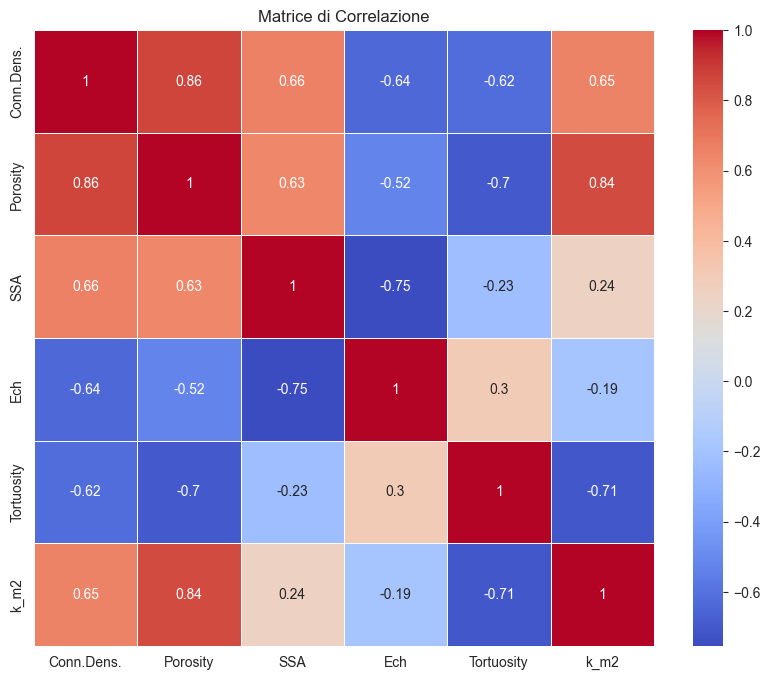

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcola la matrice di correlazione
correlation_matrix = df.corr()
print(correlation_matrix)

# Visualizza la matrice di correlazione
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matrice di Correlazione')
plt.show()

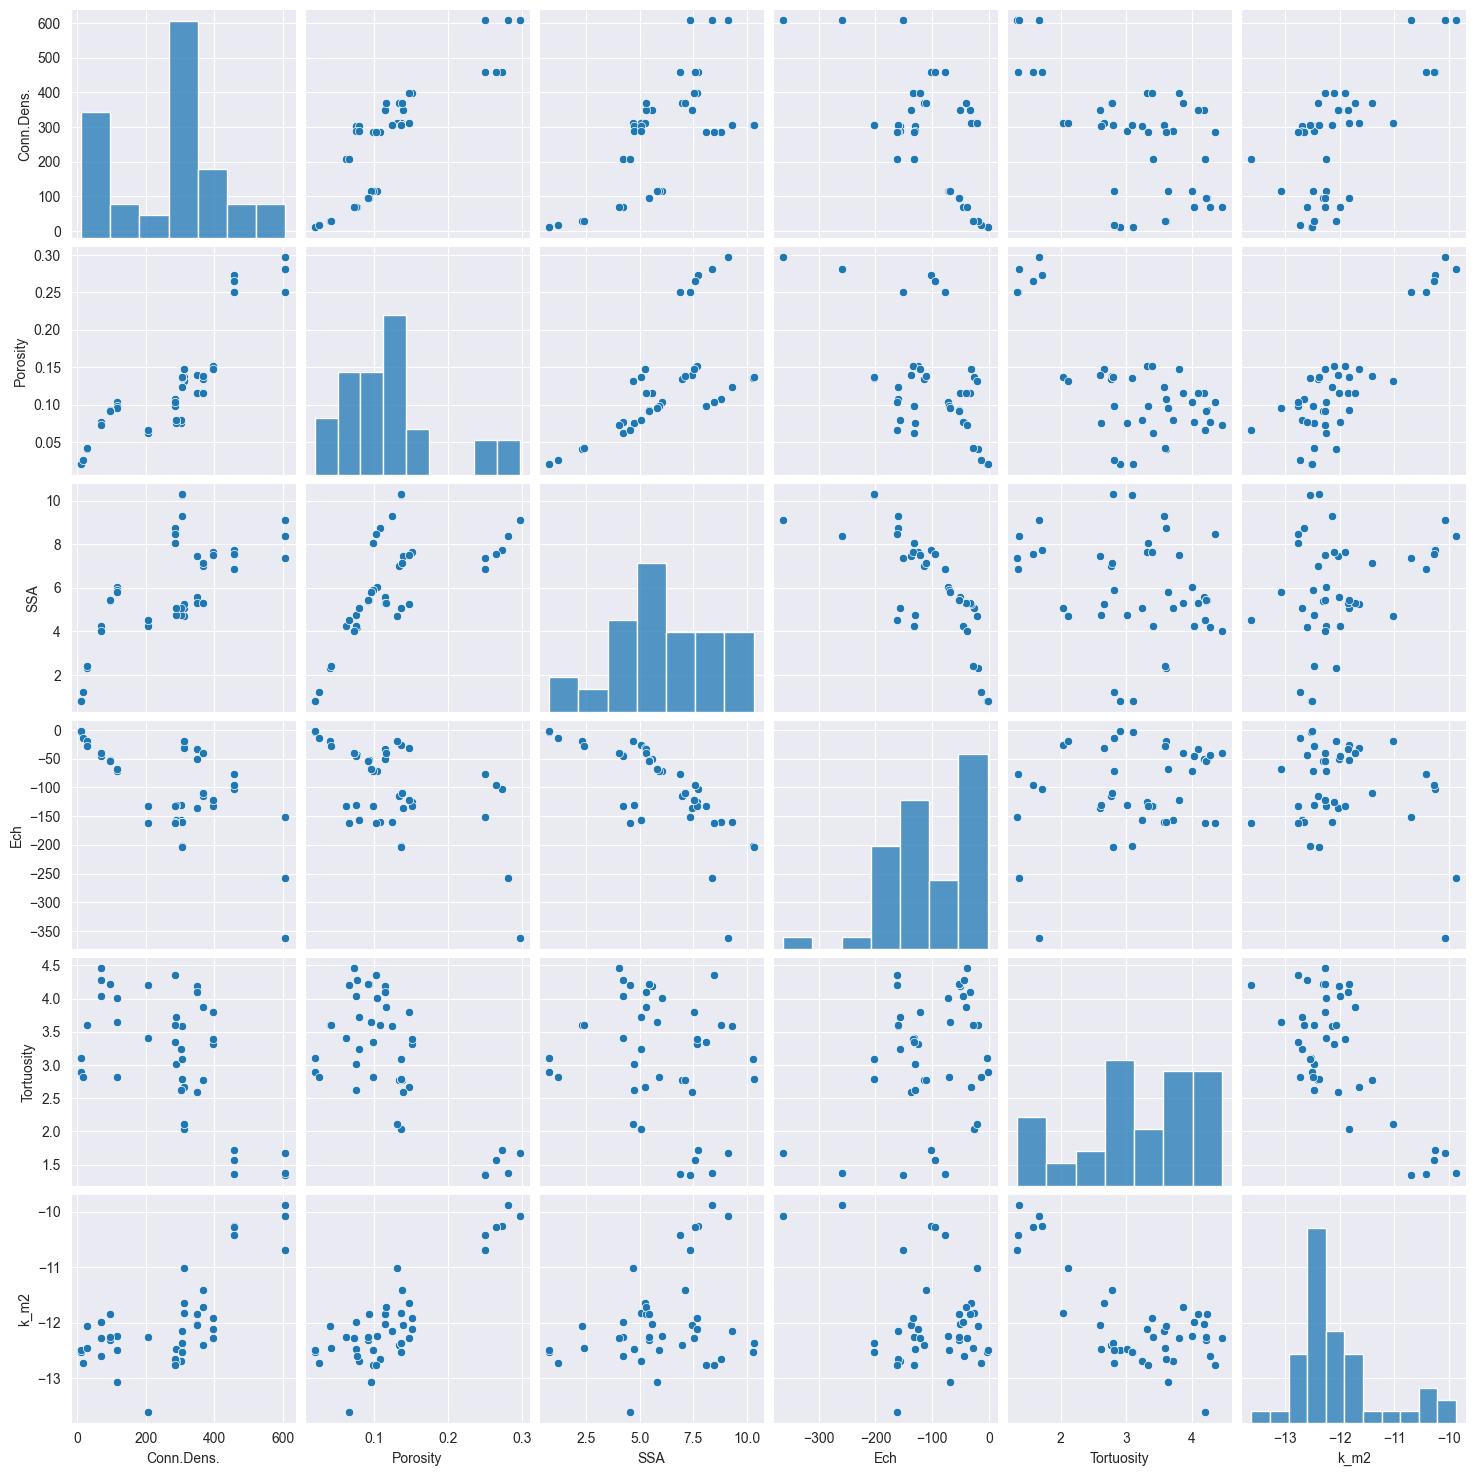

In [25]:
import numpy as np
# Crea grafici di dispersione per tutte le coppie di variabili
sns.pairplot(df)
plt.show()

In [26]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(df)
# Crea un nuovo DataFrame con i dati scalati e riassegna le colonne non scalate
#df_scaled = pd.DataFrame(scaled_data, columns=columns_to_scale)
df_scaled = pd.DataFrame(scaled_data, columns=df.columns)


# Stampa il DataFrame scalato
print("DataFrame scalato:")
print(df_scaled)

DataFrame scalato:
    Conn.Dens.  Porosity       SSA       Ech  Tortuosity      k_m2
0     0.502894  0.422383  0.449469  0.933953    0.222507  0.476669
1     0.502894  0.458484  0.469240  0.919672    0.424816  0.526208
2     0.502894  0.400722  0.410769  0.950032    0.246553  0.694191
3     0.568572  0.342960  0.503944  0.865322    0.911510  0.427581
4     0.568572  0.429603  0.699968  0.626641    0.402373  0.421597
5     0.568572  0.342960  0.475339  0.914392    0.885220  0.473661
6     0.598718  0.411552  0.651909  0.686278    0.459763  0.325166
7     0.598718  0.425993  0.666842  0.699600    0.461366  0.591105
8     0.598718  0.346570  0.473131  0.895433    0.810516  0.508338
9     0.000000  0.000000  0.000000  0.994648    0.564283  0.292215
10    0.000000  0.000000  0.001577  1.000000    0.500160  0.298538
11    0.749909  0.913357  0.728783  0.721735    0.120872  0.898455
12    0.749909  0.830325  0.639289  0.793641    0.004168  0.855751
13    0.749909  0.884477  0.711852  0.74217

Viene testato ogni possibile estimatore per trovare il migliore in base al miglior 
random state.

In [ ]:
#Snippet per comprendere quale modello è più performante con i miei dati

from sklearn.model_selection import train_test_split

# Suddivisione del dataset in set di addestramento e test
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import time
from tqdm import tqdm


X = df_scaled.drop('k_m2', axis=1)
y = df_scaled['k_m2']

# Lista degli algoritmi da testare
algorithms = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge()),
    ("Lasso Regression", Lasso()),
    ("Decision Tree Regressor", DecisionTreeRegressor()),
    ("Random Forest Regressor", RandomForestRegressor()),
    ("SVR", SVR()),
    ("Gaussian Process Regressor", GaussianProcessRegressor()),
    ("MLP Regressor", MLPRegressor(max_iter=1000)),
    ("XGBoost Regressor", XGBRegressor())
]

# Definisci un dizionario per raccogliere i risultati
results_dict = {
    "Model": [],
    "Random State": [],
    "Training RMSE": [],
    "Training MSE": [],
    "Training R^2": [],
    "Test RMSE": [],
    "Test MSE": [],
    "Test R^2": [],
    "Training Time (s)": []
}

# Ciclo attraverso gli algoritmi e i random_state
for name, model in tqdm(algorithms, desc="Testing Algorithms"):
    best_r2 = -float('inf')
    best_random_state = None
    best_train_rmse = None
    best_train_mse = None
    best_train_r2 = None
    best_test_rmse = None
    best_test_mse = None
    best_test_r2 = None
    best_training_time = None

    for random_state in range(1, 101):
        # Suddivisione del dataset in set di addestramento e test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

        # Misura il tempo di inizio dell'allenamento
        start_time = time.time()

        # Addestramento del modello
        model.fit(X_train, y_train)

        # Calcola il tempo di fine dell'allenamento
        end_time = time.time()

        # Calcola il tempo totale di addestramento
        training_time = end_time - start_time   

        # Valutazione del modello sui dati di addestramento
        y_train_pred = model.predict(X_train)
        mse_train = mean_squared_error(y_train, y_train_pred)
        rmse_train = np.sqrt(mse_train)
        r2_train = model.score(X_train, y_train)

        # Valutazione del modello sui dati di test
        y_test_pred = model.predict(X_test)
        mse_test = mean_squared_error(y_test, y_test_pred)
        rmse_test = np.sqrt(mse_test)
        r2_test = model.score(X_test, y_test)

        # Aggiorna i risultati se l'R^2 sui dati di test è migliorato
        if r2_test > best_r2:
            best_r2 = r2_test
            best_random_state = random_state
            best_train_rmse = rmse_train
            best_train_mse = mse_train
            best_train_r2 = r2_train
            best_test_rmse = rmse_test
            best_test_mse = mse_test
            best_test_r2 = r2_test
            best_training_time = training_time

    # Aggiungi i risultati migliori per ogni modello al dizionario
    results_dict["Model"].append(name)
    results_dict["Random State"].append(best_random_state)
    results_dict["Training RMSE"].append(best_train_rmse)
    results_dict["Training MSE"].append(best_train_mse)
    results_dict["Training R^2"].append(best_train_r2)
    results_dict["Test RMSE"].append(best_test_rmse)
    results_dict["Test MSE"].append(best_test_mse)
    results_dict["Test R^2"].append(best_test_r2)
    results_dict["Training Time (s)"].append(best_training_time)

# Crea un DataFrame da results_dict
risultati_alle_mod_K = pd.DataFrame(results_dict)

# Esporta il DataFrame in un file Excel
risultati_alle_mod_K.to_excel('risultati_alle_mod_K.xlsx', index=False)

print("Valutazione completata e risultati salvati in 'risultati_alle_mod_K.xlsx'.")

In [ ]:
#Snippet per comprendere quale modello è più performante con i miei dati

from sklearn.model_selection import train_test_split

# Suddivisione del dataset in set di addestramento e test
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import time
from tqdm import tqdm

# Fissare il seed per la riproducibilità
#np.random.seed(37)

# In questo esempio, consideriamo k sia la colonna target
features_X = df_scaled.drop(['k_m2'], axis=1)  # Colonne features
targets_X = df_scaled[['k_m2']]  # Colonne target

# Suddivisione del dataset in set di addestramento e test

X_train, X_test, y_train, y_test = train_test_split(features_X, targets_X, test_size=0.2, random_state=80)

# Lista degli algoritmi da testare
algorithms = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge()),
    ("Lasso Regression", Lasso()),
    ("Decision Tree Regressor", DecisionTreeRegressor()),
    ("Random Forest Regressor", RandomForestRegressor()),
    ("SVR", SVR()),
    ("Gaussian Process Regressor", GaussianProcessRegressor()),
    ("MLP Regressor", MLPRegressor()),
    ("XGBoost Regressor", XGBRegressor()),
]

# Definisci un dizionario per raccogliere i risultati
results_dict = {
    "Model": [],
    "Training RMSE": [],
    "Training MSE": [],
    "Training R^2": [],
    "Test RMSE": [],
    "Test MSE": [],
    "Test R^2": [],
    "Training Time (s)": []
}

# Ciclo attraverso gli algoritmi e addestra/valuta ciascuno
for name, model in tqdm(algorithms, desc="Testing Algorithms"):
    
    # Misura il tempo di inizio dell'allenamento
    start_time = time.time()

    # Addestramento del modello
    model.fit(X_train, y_train)

    # Calcola il tempo di fine dell'allenamento
    end_time = time.time()
    
    # Calcola il tempo totale di addestramento
    training_time = end_time - start_time   

    # Valutazione del modello sui dati di addestramento
    y_train_pred = model.predict(X_train)
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = model.score(X_train, y_train)

    # Valutazione del modello sui dati di test
    y_test_pred = model.predict(X_test)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = model.score(X_test, y_test)

    # Aggiungi i risultati al dizionario
    results_dict["Model"].append(name)
    results_dict["Training RMSE"].append(rmse_train)
    results_dict["Training MSE"].append(mse_train)
    results_dict["Training R^2"].append(r2_train)
    results_dict["Test RMSE"].append(rmse_test)
    results_dict["Test MSE"].append(mse_test)
    results_dict["Test R^2"].append(r2_test)
    results_dict["Training Time (s)"].append(training_time)

# Crea un DataFrame da results_dict
risultati_alle_mod_K = pd.DataFrame(results_dict)
# Esporta il DataFrame in un file Excel
risultati_alle_mod_K.to_excel('risultati_alle_mod_K.xlsx', index=False)

In [29]:
y_test.shape

(10, 1)

In [30]:
y_test_pred.shape

(10,)

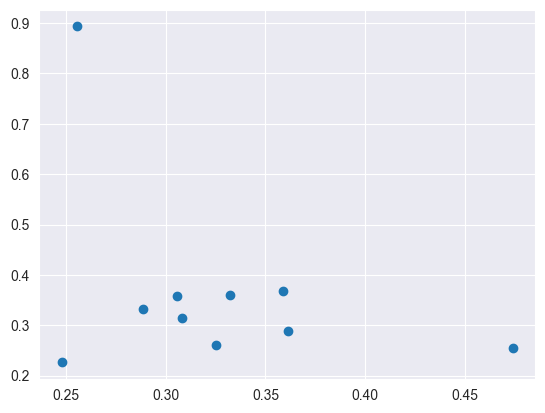

In [31]:
plt.scatter(y_test, y_test_pred)

Random State 1: R^2 = 0.20931207369108062
Random State 2: R^2 = 0.6588472435339588
Random State 3: R^2 = 0.7789374034921224
Random State 4: R^2 = 0.6227441805396359
Random State 5: R^2 = 0.12643324506884712
Random State 6: R^2 = 0.43296777409566056
Random State 7: R^2 = 0.7901587523146939
Random State 8: R^2 = 0.523863487329976
Random State 9: R^2 = 0.3429783055535237
Random State 10: R^2 = -0.0373390309425119
Random State 11: R^2 = 0.4101009384041193
Random State 12: R^2 = -0.17966065423966304
Random State 13: R^2 = -6.830368076830338
Random State 14: R^2 = 0.4841233676768395
Random State 15: R^2 = 0.5669484054852337
Random State 16: R^2 = -0.7545792840750354
Random State 17: R^2 = 0.45242501571551696
Random State 18: R^2 = 0.7141048737385484
Random State 19: R^2 = 0.8900792272004818
Random State 20: R^2 = 0.29395083865329186
Random State 21: R^2 = 0.7409985752907919
Random State 22: R^2 = 0.8900118869625384
Random State 23: R^2 = 0.8410878231357056
Random State 24: R^2 = 0.7242985694

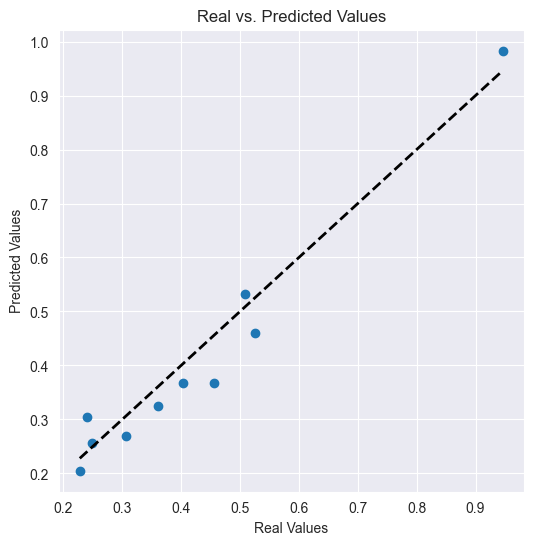

MSE: 0.002276379409375473
MAE: 0.04186912671556562
RMSE: 0.047711418018913175


In [27]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming df_scaled is already defined
features_X = df_scaled.drop(['k_m2'], axis=1)
targets_X = df_scaled[['k_m2']]

# Initialize the best R^2 and corresponding random_state
best_r2 = float('-inf')
best_random_state = None
best_index = None

# Variables to store the best split data
best_X_train = None
best_X_test = None
best_y_train = None
best_y_test = None
best_y_pred = None

# Iterate over random_state from 1 to 100
for random_state in range(1, 101):
    X_train, X_test, y_train, y_test = train_test_split(features_X, targets_X, test_size=0.2, random_state=random_state)
    
    regressor = XGBRegressor(random_state=random_state)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Random State {random_state}: R^2 = {r2}")
    
    if r2 > best_r2:
        best_r2 = r2
        best_random_state = random_state
        best_index = regressor
        best_X_train = X_train
        best_X_test = X_test
        best_y_train = y_train
        best_y_test = y_test
        best_y_pred = y_pred

print(f"\nMiglior R^2 trovato: {best_r2} con Random State: {best_random_state}")

# Train the best model again using the best random_state and split data
final_regressor = XGBRegressor(random_state=best_random_state)
final_regressor.fit(best_X_train, best_y_train)
final_y_pred = final_regressor.predict(best_X_test)

# Compare predictions with saved best predictions
print(f"Final model R^2: {r2_score(best_y_test, final_y_pred)}")
print(f"Best model R^2: {best_r2}")

# Print errors and comparison
for i in range(len(best_y_test)):
    print(f"Valore reale: {best_y_test.iloc[i]} - Valore predetto: {final_y_pred[i]} \n"
          f"Errore di previsione {abs(best_y_test.iloc[i] - final_y_pred[i])} \n")

plt.figure(figsize=(6, 6))
plt.scatter(best_y_test, final_y_pred)
plt.plot([best_y_test.min(), best_y_test.max()], [best_y_test.min(), best_y_test.max()], 'k--', lw=2)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Real vs. Predicted Values')
plt.grid(True)
plt.show()

# Additional metrics
mse_k = mean_squared_error(best_y_test, final_y_pred)
mae_k = mean_absolute_error(best_y_test, final_y_pred)
rmse_k = np.sqrt(mse_k)

print(f"MSE: {mse_k}")
print(f"MAE: {mae_k}")
print(f"RMSE: {rmse_k}")


In [ ]:
# #Ora possiamo effettuare il primo allenamento grezzo con l'estimator che ha dato i risultati migliori
# from sklearn.metrics import r2_score
# from sklearn.metrics import mean_absolute_error
# 
# regressor =  XGBRegressor( random_state = best_random_state )
# 
# regressor.fit(X_train, y_train)
# predict_k = regressor.predict(X_test)
# print(f"R 2 : {regressor.score(X_test,y_test)}" )
# mse_k = mean_squared_error(y_test, predict_k)
# print("\n")
# print(y_test)
# print("\n")
# print(predict_k)
# print("\n")
# 
# print(f"MSE: {mse_k}")
# 
# # Calcola il Mean Absolute Error (MAE)
# mae_k = mean_absolute_error(y_test, predict_k)
# print(f"MAE: {mae_k}")
# 
# # Calcola il Root Mean Squared Error (RMSE)
# rmse_k = np.sqrt(mse_k)
# print(f"RMSE: {rmse_k}")
# 
# # Real vs. Predicted Values
# plt.figure(figsize=(6, 6))
# plt.scatter(y_test, predict_k)
# # inserisci una linea bisettrice che rappresenta landamento ottimale dei valori
# plt.plot([y_test.min(),y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
# plt.xlabel('Real Values')
# plt.ylabel('Predicted Values')
# plt.title('Real vs. Predicted Values')
# plt.grid(True)
# plt.show()

In [ ]:
# Ottimizzazione degli iperparametri con GridSearchCV usando LOOCV
from sklearn.model_selection import GridSearchCV, LeaveOneOut

param_grid = {
    'n_estimators': [ 50, 70, 100],  # Numero di alberi nell'ensemble
    'max_depth': [2 ,3, 5],           # Profondità massima degli alberi
    'learning_rate': [0.01, 0.05, 0.1],  # Tasso di apprendimento (learning rate)
    'subsample': [ 0.9, 1.0],      # Percentuale di campioni da utilizzare per ogni albero
    'colsample_bytree': [0.8, 0.9],  # Percentuale di colonne da utilizzare per ogni albero
    'gamma': [0.1, 0.2],            # Riduzione minima della perdita richiesta per dividere un nodo
    'reg_alpha': [0.1, 0.5],        # Termine di regolarizzazione L1 sugli pesi delle foglie
    'reg_lambda': [0.1, 0.5]        # Termine di regolarizzazione L2 sugli pesi delle foglie
}


# Addestramento del modello con GridSearchCV
# LOOCV e random_state inizializzati direttamente nel GridSearchCV

loo = LeaveOneOut()
grid_search = GridSearchCV(final_regressor, param_grid, cv=loo, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(best_X_train, best_y_train)
best_model = grid_search.best_estimator_

# # Valutazione finale delle sole performance della LOOCV
# performance = []
# 
# for train_index, test_index in loo.split(df_scaled):
#     X_train_loo, X_test_loo = df_scaled.drop('k_m2', axis=1).iloc[train_index], df_scaled.drop('k_m2', axis=1).iloc[test_index]
#     y_train_loo, y_test_loo = df_scaled['k_m2'].iloc[train_index], df_scaled['k_m2'].iloc[test_index]
# 
#     best_model.fit(X_train_loo, y_train_loo)
#     y_pred_loo = best_model.predict(X_test_loo)
#     mse_loo = mean_squared_error(y_test_loo, y_pred_loo)
#     performance.append(mse_loo)
# 
# media_performance = np.mean(performance)
# print(f"Media MSE sulla LOOCV: {media_performance}")

# Plot delle prestazioni finali
best_model.fit(best_X_train, best_y_train)
y_pred = best_model.predict(X_test)
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred)
plt.plot([best_y_test.min(), best_y_test.max()], [best_y_test.min(), best_y_test.max()], 'k--', lw=2)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Real vs. Predicted Values') 
plt.grid(True)
plt.show()

Fitting 37 folds for each of 864 candidates, totalling 31968 fits


In [ ]:
y_test_originale = []
for i in range(len(y_test)):
    y_test_originale.append(
        y_test.iloc[i] * (k2_max - k2_min) + k2_min
    )

y_pred_originale = []
for i in range(len(y_pred)):
    y_pred_originale.append(
        y_pred[i] * (k2_max - k2_min) + k2_min
    )

y_pred_originale = np.array(y_pred_originale)
y_test_originale = np.array(y_test_originale)

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
plt.figure(figsize=(6, 6))
plt.xlim(0.15*10**-12, 0.8*10**-12)
plt.ylim(0.15*10**-12, 0.8*10**-12)
plt.scatter(y_test_originale, y_pred_originale)
plt.plot([y_test_originale.min(), y_test_originale.max()], [y_test_originale.min(), y_test_originale.max()], 'k--', lw=2)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Real vs. Predicted Values')
plt.grid(True)
plt.show()    

In [ ]:
#### test iperparametri più veloce...meno valori da provare....codice funzionante e veloce!!!

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import time

# Definisci gli iperparametri da cercare
param_grid = {
    'n_estimators': [50,100,200],
    'max_depth': [2, 3, 4, 8],
    'max_features': [0.1, 0.5, 1,2, 5],
    'min_samples_split': [2, 3, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4],
    'criterion': ['friedman_mse','absolute_error','squared_error']

}

regressor = RandomForestRegressor(random_state=49)
loocv = LeaveOneOut()

# Crea un oggetto GridSearchCV per la ricerca degli iperparametri con cross-validation
grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_squared_error', verbose = 1)
# Lista per tenere traccia del tempo di esecuzione di ciascun set di iperparametri
execution_times = []
# Definisci il tempo massimo di esecuzione in secondi (300 secondi = 5 minuti)
max_execution_time = 300
start_time = time.time()
# Esegui la ricerca degli iperparametri
grid_search.fit(X_train, y_train.values.ravel())

end_time = time.time()
training_time = end_time - start_time
# Trova il miglior modello
best_model = grid_search.best_estimator_
# Valuta il modello sul set di test
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_bestModel = best_model.score(X_test, y_test)

print("Best Parameters:", grid_search.best_params_)
print("Best MSE Score:", -grid_search.best_score_)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2_bestModel)
print("Training Time (seconds):", training_time)


In [ ]:
# Assicurati che siano array NumPy o serie Pandas
y_test = np.array(y_test)
predictions_rf = np.array(y_pred)
# Analisi degli errori
errore = []
for i in range(len(y_test)):
   errore.append(y_test[i] - predictions_rf[i])
print(errore)
print("--------------------")
# Supponendo che errore sia la tua lista di array
errore_concatenato = np.concatenate(errore)

# Creare un DataFrame pandas con una colonna chiamata 'Errore'
df_errore = pd.DataFrame({'Errore': errore_concatenato})

# Grafico degli errori
plt.scatter(predictions_rf, df_errore)
plt.xlabel('Previsioni')
plt.ylabel('Errori')
plt.title('Analisi degli Errori (RandomForestRegressor)')
plt.show()


In [ ]:
#Codice che mi serve solo per controllare se l'allenamento procede correttamente.
#Devo controllare che gli errori non si discostino troppo dai valori reali
#Ora controllo dopo averlo allenato col modello migliore utilizzando gli iperparametri migliori

errorilist2 = []

for a in range(0, len(y_test)):
    errorilist2.append(abs(y_ravel[a] - y_pred[a]))
    print(f"Valore reale: {y_ravel[a]} - Valore predetto: {y_pred[a]} \n"
         f"Errore di previsione { abs(y_ravel[a] - y_pred[a]) } \n")
    
erroriList2 = np.array(errorilist2)

# De-standardizzazione dei residui
residui_originali_2 = []
print(y_test)
for i in range(len(erroriList2)):
    residui_originali_2.append(
        erroriList2[i] * (k2_max - k2_min) + k2_min
    )

print("Residui originali: \n", residui_originali_2)

In [ ]:
# In questa sezione devo verificare se il range di errore destandardizzato è accettabile
# L'errore può essere accettabile se non supera il range di un'ordine di grandezza

sentinella = 0
# Il rapporto che governerà questo range sarà il seguente:
# 0.7 < (y_test[i] / residui_originali[i]) < 1.3         -->     controllo del (+/-) 30% di errore
for i in range(len(y_test)):
    if 1.000000000000001 > (np.log10(y_ravel[i]) / np.log10(residui_originali_2[i])) > 0.999999999999:
        print(f"Errore di previsione del dato {i} superiore al range ammissibile di un'ordine di grandezza")
        sentinella = 1

if sentinella == 0: 
    print("Tutti gli errori rientrano nel range di accettabilità")

In [ ]:
#Eseguo una cross validation per verificare se il modello è robusto con la tecnica LOOCV

from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error
import numpy as np

# Inizializza lo schema LOOCV
loo = LeaveOneOut()

# Inizializza un array per tenere traccia delle prestazioni
performance = []

# Ciclo attraverso le iterazioni della LOOCV
for train_index, test_index in loo.split(df_scaled):
    X_train, X_test = df_scaled.drop('k_m2', axis=1).iloc[train_index], df_scaled.drop('k_m2', axis=1).iloc[test_index]
    y_train, y_test = df_scaled['k_m2'].iloc[train_index], df_scaled['k_m2'].iloc[test_index]

    # Addestra il regressore
    best_model.fit(X_train, y_train)

    # Valuta le prestazioni sul set di test
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    performance.append(mse)

# Media degli errori quadratici medi ottenuti in ciascuna iterazione
media_performance = np.mean(performance)
print(f"Media MSE sulla LOOCV: {media_performance}")

# #Escludo i valori con la varianza maggiore di de
# performance_senza_outlier = []
# 
# for valore in performance:
#     if valore <= 0.05:
#         performance_senza_outlier.append(valore)

# Plot delle prestazioni in ciascuna iterazione
plt.plot(performance, marker='o')
plt.xlabel('Iterazione LOOCV')
plt.ylabel('MSE')
plt.title('Prestazioni nella LOOCV')
plt.show()

In [ ]:
#Ho identificato alcune soglie con il quale è possibile visualizzare meglio le performance dell'algoritmo LOO
# Per fare ciò però ogni volta è necessario eliminare i valori al di sopra di quelle soglie. Verranno provate multiple visualizzazione in modo da non 
# perdere nessun valore utile

soglie = [0.05, 0.003, 0.0013, 0.000213, 0.00006, 0.00003]

# Ciclo attraverso le soglie
for soglia in soglie:
    # Riinizializza l'array ad ogni iterazione
    performance_senza_outlier = []

    # Filtra gli outlier in base alla soglia corrente
    for valore in performance:
        if valore <= soglia:
            performance_senza_outlier.append(valore)

    # Stampa e plotta le prestazioni senza outlier
    print(f"Plot per la soglia {soglia}")
    plt.plot(performance_senza_outlier, marker='o')
    plt.xlabel('Iterazione LOOCV')
    plt.ylabel('MSE')
    plt.title(f'Prestazioni nella LOOCV con soglia {soglia}')
    plt.show()

In [ ]:
# ANALISI DEI RESIDUI

#QQ plot
from scipy import stats

stats.probplot(erroriList2, plot=plt)
plt.title('Q-Q Plot dei Residui')
plt.show()


In [ ]:
# salvare il modello allenato di XGBoost
import pickle

# Salva il modello su disco
with open('RandomForestRegressor_Permeability.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

print("Modello salvato come 'RandomForestRegressor_Permeability.pkl'")
##################################################################

# Carica il modello salvato
import pickle
with open('RandomForestRegressor_Permeability.pkl', 'rb') as model_file:
    loaded_model_RFR_Perm = pickle.load(model_file)